In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [26]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [27]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [28]:
# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [29]:
# Initialize the model
model = Sequential()


In [30]:
# Flatten the 28x28 images to a 784-element array
model.add(Flatten(input_shape=(28, 28)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Add a hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))


In [32]:
# Add another hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))


In [33]:
# Add the output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [36]:
!pip install tensorflow
from tensorflow import keras
from keras.layers import Dense, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D


# Assuming 'model' is a Keras Sequential model
model = keras.Sequential()


# Add a convolutional layer to process the input images
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# input_shape is set to match your x_train data
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())  # Flatten the output for the Dense layers


# Add layers (Your existing code from ipython-input-31-4cd9f25476aa, ipython-input-32-4cd9f25476aa, ipython-input-33-4cd9f25476aa)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model (Your existing code from ipython-input-0-4cd9f25476aa)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can fit the model (Your existing code from ipython-input-34-4cd9f25476aa)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3838 - loss: 1.6846 - val_accuracy: 0.5888 - val_loss: 1.1582
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.6020 - loss: 1.1234 - val_accuracy: 0.6329 - val_loss: 1.0401
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6670 - loss: 0.9466 - val_accuracy: 0.6655 - val_loss: 0.9641
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7104 - loss: 0.8319 - val_accuracy: 0.6817 - val_loss: 0.9288
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7398 - loss: 0.7392 - val_accuracy: 0.6973 - val_loss: 0.8843
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7656 - loss: 0.6708 - val_accuracy: 0.6662 - val_loss: 1.0165
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7926 - loss: 0.5934 - val_accuracy: 0.6858 - val_loss: 0.9445
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.8157 -

In [38]:
import tensorflow as tf

# Preprocess the input data
def preprocess_image(image):
  """Resizes and converts an image to grayscale.

  Args:
    image: A 3D tensor representing an RGB image.

  Returns:
    A 2D tensor representing a grayscale image.
  """
  # Resize to match the input shape of the model
  image = tf.image.resize(image, [32, 32])  # Resize to 32x32 to match the model's input shape
  # Don't convert to grayscale as the model expects 3 channels
  #image = tf.image.rgb_to_grayscale(image)
  return image

# Apply preprocessing to the first 5 images in x_test
preprocessed_images = [preprocess_image(img) for img in x_test[:5]]

# Convert the list of preprocessed images back to a NumPy array
# if necessary (e.g., if your model expects a NumPy array input)
preprocessed_images = tf.stack(preprocessed_images, axis=0).numpy()

# Make predictions using the preprocessed images
predictions = model.predict(preprocessed_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [39]:
 # Print predicted classes
print("Predicted classes:", np.argmax(predictions, axis=1))
print("True classes:", np.argmax(y_test[:5], axis=1))


Predicted classes: [3 8 8 0 4]
True classes: [3 8 8 0 6]


In [40]:
import matplotlib.pyplot as plt
import random


In [41]:
# Select a random image from the test set
random_index = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])


In [42]:
# Select a random image from the test set
random_index = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])

# Preprocess the random image to match the model's expected input shape
random_image = preprocess_image(random_image) # Call the preprocess function

# Add a batch dimension (if the model requires it)
random_image = tf.expand_dims(random_image, axis=0).numpy()

# Make a prediction on the random image
prediction = model.predict(random_image)
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


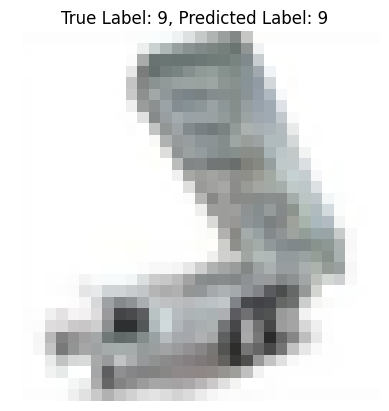

In [43]:
# Display the image and prediction result
plt.imshow(random_image.squeeze(), cmap='gray') # Squeeze the array to remove the batch dimension
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()